In [50]:
# numpy pandas
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
#step 1: load Data and show the simple view of the data
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [53]:
# step 2: analyze and understand the data deeply
# step 3: feature engerneering 
# Process every feature in this step.

# 1 drop the unnecessary columns.
#  these columns won't be useful in analysis and predict.
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test_df = test_df.drop(['Name', 'Ticket'], axis = 1)

1 Series.value_counts()  值-频次 直方图
结果 Series : index-值  value-频次

    In [70]: s.value_counts()
    Out[70]: 
    A    5
    B    2
    C    2
    D    1
    dtype: int64

2 seaborn 更高级封装的matplotlib

    sns.factorplot(X_key, Y_key, data = df, size = n, aspect = n)
        点形式分组均值图
    sns.countplot(x= x_key, data=df, ax=axis)
        统计直方图
    sns.barplot(x=x_key, y=y_key, data=df, order=[value], ax=axis)
        bar形式分组均值图

3 df[['key1', 'key2']].groupby(['keyn'].mean()
    
    分类统计信息

4 pd.get_dummies(Series)
    
    df = pd.get_dummies(Series)
    将label型特征 生成为one-hot 形 df.
    将Series 生成 one-hot形式df. 这样很多算法才能使用.
    生成了one-hot 之后去掉某个one, 那剩下的都为0 时, 实际上即表示了去掉的那个. 所以实际上生成了one-hot是有个特征冗余的. 所以一般都会去掉最后一个.
    
5 df.join(df1)
    向df中加入df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0,0
1,1,1,female,38.0,1,0,71.2833,C85,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0
3,1,1,female,35.0,1,0,53.1000,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,0,0


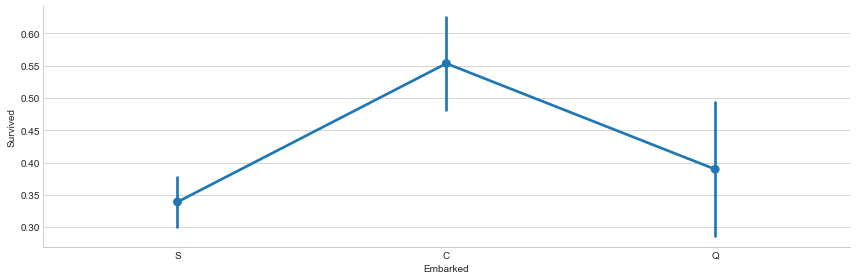

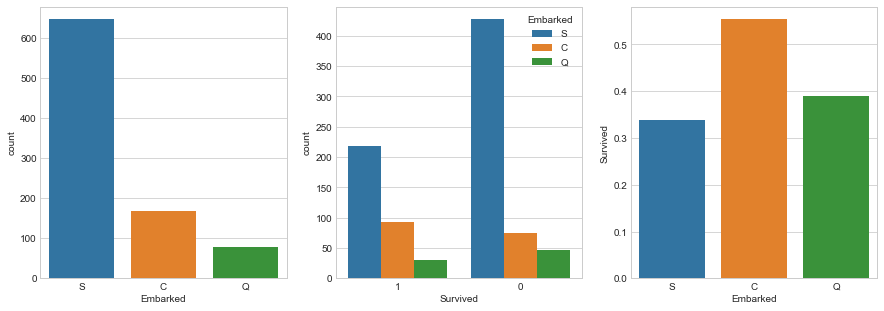

In [54]:
# Embarked 
# Either to consider Embarked column in predictions,
# and remove "S" dummy variable,
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it,
# because logically, Embarked doesn't seem to be useful in prediction.



# fill the two missing value with the most occured value.
freq_Embarked = train_df['Embarked'].value_counts().index[0]
train_df['Embarked'] = train_df['Embarked'].fillna(freq_Embarked)


sns.factorplot('Embarked', 'Survived', data=train_df, size=4, aspect=3)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=train_df, ax=axis1)

sns.countplot(x='Survived', hue='Embarked', data=train_df, order=[1, 0], ax=axis2)

embarked_perc = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embarked_perc, order=['S', 'C', 'Q'], ax=axis3)



#1 pd.get_dummies, 生成one-hot 可以被算法处理的特征。
#2 去掉one-hot冗余特征
embarked_dummies_train = pd.get_dummies(train_df['Embarked'])
embarked_dummies_train.drop(['S'], axis=1, inplace=True)
embarked_dummies_test = pd.get_dummies(test_df['Embarked'])
embarked_dummies_test.drop(['S'], axis=1, inplace=True)

train_df = train_df.join(embarked_dummies_train)
test_df = test_df.join(embarked_dummies_test)

#去掉原始特征
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df.head()


STD 标准差
    标准差（Standard Deviation），在概率统计中最常使用作为 统计分布程度（statistical dispersion）上的测量
    标准差（Standard Deviation） ，中文环境中又常称均方差，是离均差平方的算术平均数的平方根，用σ表示。
    标准差是方差的算术平方根（开根号)。
    标准差能反映一个数据集的离散程度。平均数相同的两组数据，标准差未必相同。
    简单来说，标准差是一组数据平均值分散程度的一种度量。一个较大的标准差，代表大部分数值和其平均值之间差异较大；一个较小的标准差，代表这些数值较接近平均值。
例如，两组数的集合 {0,5,9,14} 和 {5,6,8,9} 其平均值都是 7 ，但第二个集合具有较小的标准差。
    标准差应用于投资上，可作为量度回报稳定性的指标。标准差数值越大，代表回报远离过去平均数值，回报较不稳定故风险越高。相反，标准差数值越小，代表回报较为稳定，风险亦较小。
        

                  0
Survived           
0         21.690346
1         47.991228
                  0
Survived           
0         31.392191
1         66.608344


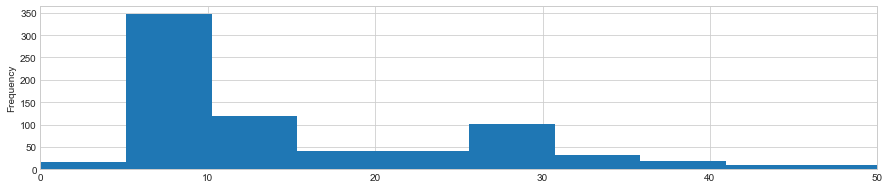

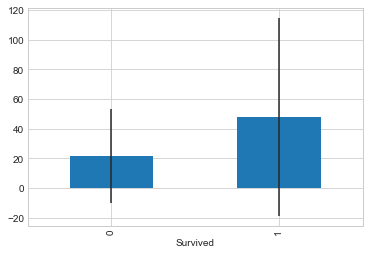

In [55]:

##   Fare

test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

fare_not_survived = train_df['Fare'][train_df['Survived'] == 0]
fare_survived = train_df['Fare'][train_df['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

# 值-频次 统计直方图.
train_df['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

# index - Survived. can't understand
average_fare.index.names = std_fare.index.names = ['Survived']
average_fare.plot(yerr=std_fare, kind='bar', legend=False)
print(average_fare)
print(std_fare)


1 Series.std() Series.mean()
    和 ndarray.std mean 都是一样的效果.
2 Series.isnull()
    获得一个 True - False list.
3 df.hist() 
    pd 的画图功能, 更简单的画图功能, 只提供基本画图,不提供复杂的参数调整.
    为了方便查看数据关系, 进行数据分析.
4 np.random.randint(start, end, size)
    生成随机数list - 随机整数
    size 生成的list长度.

C:\Users\nan\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nan\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


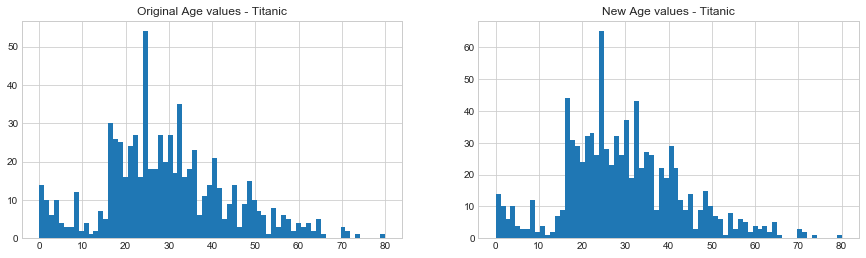

In [56]:
# Age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,4))
axis1.set_title("Original Age values - Titanic")
axis2.set_title("New Age values - Titanic")

# get mean std info
# 统计isnull 数目, 实际在上面 train_df.info() 中有
average_age_train = train_df['Age'].mean()
std_age_train = train_df['Age'].std()
count_nan_age_train = train_df['Age'].isnull().sum()

average_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
count_nan_age_test = test_df['Age'].isnull().sum()

rand_age_train = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size= count_nan_age_train)
rand_age_test = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size=count_nan_age_test)

#plot 
# dropna() and convert to int.
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# train_df.loc[train_df['Age'].isnull(), 'Age'] = rand_age_train
# test_df.loc[test_df['Age'].isnull(), 'Age'] = rand_age_test
train_df['Age'][np.isnan(train_df['Age'])] = rand_age_train
test_df['Age'][np.isnan(test_df['Age'])] = rand_age_test
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

train_df['Age'].hist(bins=70, ax=axis2)


# 
facet = sns.FacetGrid(train_df, hue= 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))